# Regression Using Linear Neural Network


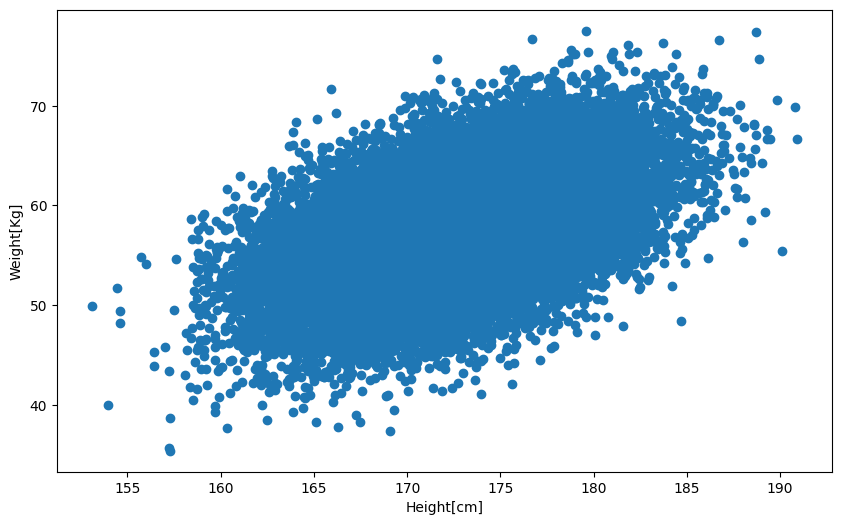

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import pandas as pd

data = pd.read_csv('./data/SOCR-HeightWeight.csv')

heights = torch.tensor(data['Height(Inches)'], dtype=torch.float32).reshape(-1, 1) * 2.54
weights = torch.tensor(data['Weight(Pounds)'], dtype=torch.float32).reshape(-1, 1) * 0.453592

plt_1 = plt.figure(figsize=(10, 6))
plt.scatter(heights, weights)
plt.xlabel('Height[cm]')
plt.ylabel('Weight[Kg]')
plt.show()

## Data preparation

In [3]:
std_h, m_h = torch.std_mean(heights)
heights = (heights - m_h ) / std_h

std_w, m_w = torch.std_mean(weights)
weights = (weights - m_w ) / std_w


## Design a neural network

### <span style="color:yellow"> Normalization layer is needed!! </span>
https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

`Batch Normalization prevents gradient vanishing or exploding`  

`BatchNorm1d` requires length of sequence for 1D inputs

`BatchNorm1d` requires only `number of channels` for 2D inputs

In [4]:
m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output = m(input)
print(output.shape)

#BatchNorm1d requires only number of channels (3) for 2D inputs
m = nn.BatchNorm1d(3)
input = torch.randn(20, 3, 100)
output = m(input)
print(output.shape)

torch.Size([20, 100])
torch.Size([20, 3, 100])


In [5]:
model = nn.Linear(1,1)

## Training

Epoch[1/1000], loss: 1.718222 weight [[-0.39155367]] bias [-0.3643104] 
Epoch[2/1000], loss: 1.679767 weight [[-0.37366614]] bias [-0.3570242] 
Epoch[3/1000], loss: 1.642835 weight [[-0.35613632]] bias [-0.3498837] 
Epoch[4/1000], loss: 1.607365 weight [[-0.3389571]] bias [-0.34288603] 
Epoch[5/1000], loss: 1.573300 weight [[-0.32212144]] bias [-0.3360283] 
Epoch[6/1000], loss: 1.540584 weight [[-0.3056225]] bias [-0.32930773] 
Epoch[7/1000], loss: 1.509163 weight [[-0.2894535]] bias [-0.32272157] 
Epoch[8/1000], loss: 1.478986 weight [[-0.27360788]] bias [-0.31626713] 
Epoch[9/1000], loss: 1.450005 weight [[-0.25807917]] bias [-0.30994177] 
Epoch[10/1000], loss: 1.422171 weight [[-0.24286102]] bias [-0.30374292] 
Epoch[11/1000], loss: 1.395439 weight [[-0.22794722]] bias [-0.29766804] 
Epoch[12/1000], loss: 1.369766 weight [[-0.21333168]] bias [-0.29171467] 
Epoch[13/1000], loss: 1.345109 weight [[-0.19900845]] bias [-0.28588036] 
Epoch[14/1000], loss: 1.321429 weight [[-0.18497166]] 

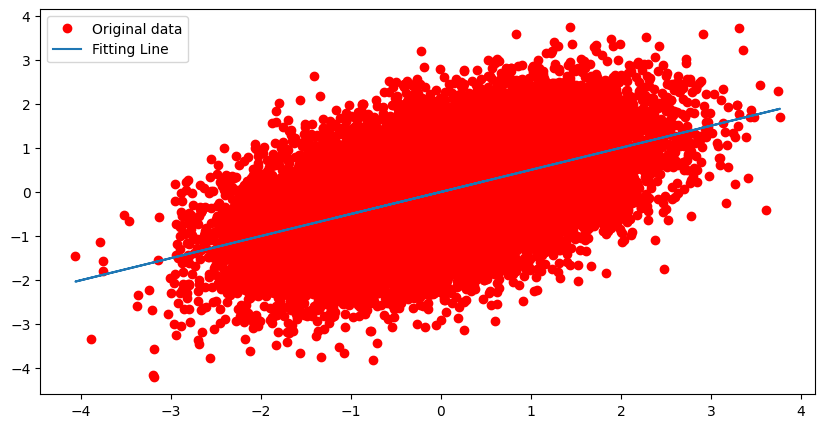

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    # forward
    out = model(heights)
    loss = criterion(out, weights)
    # backward
    loss.backward()
    optimizer.step()

    print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}', end=' ')
    for name, param in model.named_parameters():
        print (name, param.data.numpy(), end=' ')
    print()
    
    
model.eval()
with torch.no_grad():
    predict = model(heights)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(heights.numpy(), weights.numpy(), 'ro', label='Original data')
plt.plot(heights.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()

## Evaluate the model

In [8]:
h = torch.tensor([[190]], dtype=torch.float32)
model.eval()
w = model(h)
print(w)
#model.train()


tensor([[95.5428]], grad_fn=<AddmmBackward0>)


# Dataset and DataLoader Supporint Batch

Epoch[1/1000], Sampling[0]loss: 2.525116 weight [[-0.5048276]] bias [0.88983643] 
Epoch[1/1000], Sampling[1]loss: 2.570833 weight [[-0.4843728]] bias [0.8706834] 
Epoch[1/1000], Sampling[2]loss: 2.394693 weight [[-0.4675792]] bias [0.85285425] 
Epoch[1/1000], Sampling[3]loss: 2.406650 weight [[-0.44937426]] bias [0.8348209] 
Epoch[1/1000], Sampling[4]loss: 2.258736 weight [[-0.43122816]] bias [0.8197028] 
Epoch[1/1000], Sampling[5]loss: 2.586457 weight [[-0.40949824]] bias [0.80147266] 
Epoch[1/1000], Sampling[6]loss: 2.403027 weight [[-0.39063463]] bias [0.7856293] 
Epoch[1/1000], Sampling[7]loss: 2.129889 weight [[-0.37401402]] bias [0.76893586] 
Epoch[1/1000], Sampling[8]loss: 2.207524 weight [[-0.3537571]] bias [0.7531419] 
Epoch[1/1000], Sampling[9]loss: 2.188698 weight [[-0.3339807]] bias [0.7369239] 
Epoch[1/1000], Sampling[10]loss: 1.999047 weight [[-0.31494367]] bias [0.7235766] 
Epoch[1/1000], Sampling[11]loss: 1.877987 weight [[-0.2989247]] bias [0.71068853] 
Epoch[1/1000], 

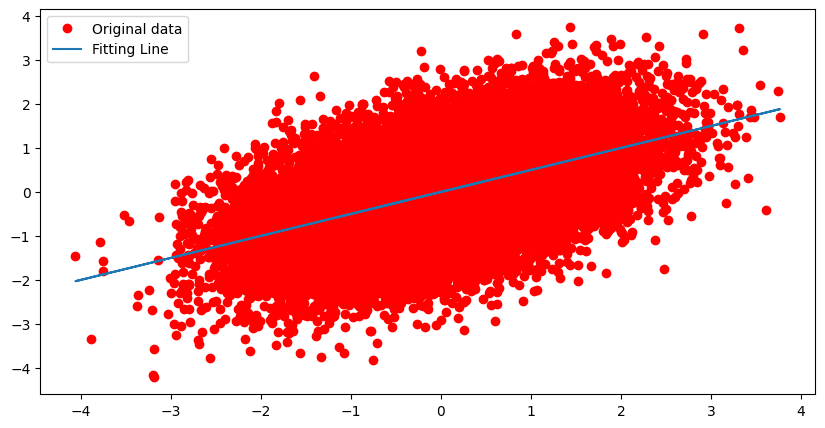

In [14]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

ds = TensorDataset(heights, weights)
dl = DataLoader(ds, batch_size=512, shuffle=True, drop_last=False)

model = nn.Linear(1,1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(100):
    i = 0
    for hs, ws in dl:
        optimizer.zero_grad()
        # forward
        out = model(hs)
        loss = criterion(out, ws)
        # backward
        loss.backward()
        optimizer.step()

        print(f'Epoch[{epoch+1}/{num_epochs}], Sampling[{i}]loss: {loss.item():.6f}', end=' ')
        i +=1
        for name, param in model.named_parameters():
            print (name, param.data.numpy(), end=' ')
        print()



    
model.eval()
with torch.no_grad():
    predict = model(heights)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(heights.numpy(), weights.numpy(), 'ro', label='Original data')
plt.plot(heights.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()        

# Deep multi-layer

Epoch[1/100]   loss: 0.662656
Epoch[2/100]   loss: 0.701892
Epoch[3/100]   loss: 0.812078
Epoch[4/100]   loss: 0.730210
Epoch[5/100]   loss: 0.778233
Epoch[6/100]   loss: 0.759883
Epoch[7/100]   loss: 0.846972
Epoch[8/100]   loss: 0.779366
Epoch[9/100]   loss: 0.714135
Epoch[10/100]   loss: 0.812865
Epoch[11/100]   loss: 0.860130
Epoch[12/100]   loss: 0.797146
Epoch[13/100]   loss: 0.758948
Epoch[14/100]   loss: 0.786573
Epoch[15/100]   loss: 0.723091
Epoch[16/100]   loss: 0.767172
Epoch[17/100]   loss: 0.721044
Epoch[18/100]   loss: 0.779785
Epoch[19/100]   loss: 0.714102
Epoch[20/100]   loss: 0.770193
Epoch[21/100]   loss: 0.765777
Epoch[22/100]   loss: 0.758862
Epoch[23/100]   loss: 0.782221
Epoch[24/100]   loss: 0.788193
Epoch[25/100]   loss: 0.736801
Epoch[26/100]   loss: 0.723835
Epoch[27/100]   loss: 0.761118
Epoch[28/100]   loss: 0.784647
Epoch[29/100]   loss: 0.727847
Epoch[30/100]   loss: 0.687984
Epoch[31/100]   loss: 0.716046
Epoch[32/100]   loss: 0.853315
Epoch[33/100]   l

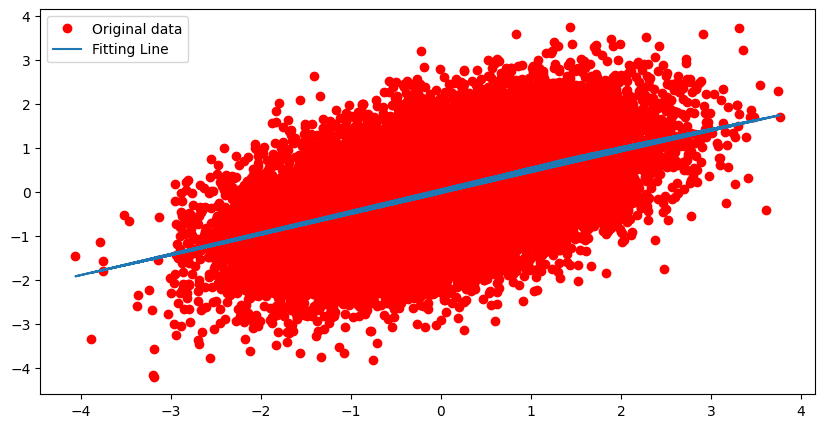

In [17]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

ds = TensorDataset(heights, weights)
dl = DataLoader(ds, batch_size=1024, shuffle=True, drop_last=False)



class linearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 100)  # input and output is 1 dimension
        self.l2 = nn.Linear(100, 10)  # input and output is 1 dimension
        self.l3 = nn.Linear(10, 1)  # input and output is 1 dimension
                
    def forward(self, x):
        x = self.l1(x)
        x = nn.functional.relu(x)

        x = self.l2(x)
        x = nn.functional.relu(x)

        out = self.l3(x)
        
        return out
model = linearRegression()
criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

num_epochs=100
for epoch in range(num_epochs):
    i = 0
    for hs, ws in dl:
        optimizer.zero_grad()
        # forward
        out = model(hs)
        loss = criterion(out, ws)
        # backward
        loss.backward()
        optimizer.step()

    print(f'Epoch[{epoch+1}/{num_epochs}]   loss: {loss.item():.6f}')


    
model.eval()
with torch.no_grad():
    predict = model(heights)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(heights.numpy(), weights.numpy(), 'ro', label='Original data')
plt.plot(heights.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()        